How to run this code:

open file in colab and run cell by cell.

In [ ]:
#importing important libraries
import numpy as np
import random
import matplotlib.pyplot as plt

In [ ]:
#defining constants to help make code more readable
WALL = 2
EMPTY = 0
CAN = 1
NULL = -1

In [ ]:
#defining parameters
Q_matrix = None #no values initially
num_of_episodes = 5000
steps = 200
learning_rate = 0.2
gamma = 0.9

In [ ]:
class GridWorld:
    def __init__(self, robby_loc=(-1, -1)):# default robbys location, not yet set within grid boundaries.
        self.robby_location = robby_loc
        self.grid = np.zeros((10, 10))
        for row in range(10):
            for col in range(10):
                self.grid[row, col] = random.randint(0, 1)#0 empty, 1 can


    def set_robby_location(self, loc=(0, 0)):
        self.robby_location = loc #setter method that allows us set robbys location to any point after grid world is created

In [ ]:

class Robby:

    def __init__(self):
        # placing robby randomnly at beginning of simulation
        self.location_x_coor = random.randint(0, 9)
        self.location_y_coor = random.randint(0, 9)

        # Setup grid
        self.robby_grid = GridWorld((self.location_x_coor, self.location_y_coor))
        #initializing reward and sensor states
        self.reward = 0
        self.define_here = NULL
        self.define_north = NULL
        self.define_south = NULL
        self.define_west = NULL
        self.define_east = NULL
        #self.predict_state()

    def predict_state(self):

        if self.robby_grid.grid[self.location_x_coor, self.location_y_coor] == CAN:
            self.define_here = CAN
        else:
            self.define_here = EMPTY

        if self.location_x_coor == 0:
            self.define_north = WALL
        elif self.robby_grid.grid[self.location_x_coor - 1, self.location_y_coor]:
            self.define_north = CAN
        else:
            self.define_north = EMPTY

        if self.location_x_coor == 9:
            self.define_south = WALL
        elif self.robby_grid.grid[self.location_x_coor + 1, self.location_y_coor]:
            self.define_south = CAN
        else:
            self.define_south = EMPTY

        if self.location_y_coor == 0:
            self.define_west = WALL
        elif self.robby_grid.grid[self.location_x_coor, self.location_y_coor - 1]:
            self.define_west = CAN
        else:
            self.define_west = EMPTY

        if self.location_y_coor == 9:
            self.define_east = WALL
        elif self.robby_grid.grid[self.location_x_coor, self.location_y_coor + 1]:
            self.define_east = CAN
        else:
            self.define_east = EMPTY

    def set_robby_location(self, x_val_coor, y_val_coor):
        self.location_x_coor = x_val_coor
        self.location_y_coor = y_val_coor
        self.robby_grid.set_robby_location(x_val_coor, y_val_coor)#updates location

    # calculate the state in the Qmatrix
    def get_q_matrix_State(self):
        return ((3 ** 0) * self.define_here + (3 ** 1) * self.define_east +
                (3 ** 2) * self.define_west + (3 ** 3) * self.define_south + (3 ** 4) * self.define_north)

    def move_east(self):
        if self.location_y_coor == 9:
            self.reward -= 5
            self.predict_state()
            return -5
        else:
            self.location_y_coor += 1
            self.robby_grid.set_robby_location((self.location_x_coor, self.location_y_coor))
            self.predict_state()
            return 0

    def move_west(self):
        if self.location_y_coor == 0:
            self.reward -= 5
            self.predict_state()
            return -5
        else:
            self.location_y_coor -= 1
            self.robby_grid.set_robby_location((self.location_x_coor, self.location_y_coor))
            self.predict_state()
            return 0

    def move_north(self):
        if self.location_x_coor == 0:
            self.reward -= 5
            self.predict_state()
            return -5
        else:
            self.location_x_coor -= 1
            self.robby_grid.set_robby_location((self.location_x_coor, self.location_y_coor))
            self.predict_state()
            return 0

    def move_south(self):
        if self.location_x_coor == 9:
            self.reward -= 5
            self.predict_state()
            return -5
        else:
            self.location_x_coor += 1
            self.robby_grid.set_robby_location((self.location_x_coor, self.location_y_coor))
            self.predict_state()
            return 0

    def pickup_can(self):
        if self.robby_grid.grid[self.location_x_coor, self.location_y_coor]==CAN:
            self.reward += 10
            self.robby_grid.grid[self.location_x_coor, self.location_y_coor] = 0
            self.predict_state()
            return 10
        else:
            self.reward -= 1
            return -1

    def do_action(self, rand):
        if rand == 0:
            return self.move_north()
        elif rand == 1:
            return self.move_south()
        elif rand == 2:
            return self.move_east()
        elif rand == 3:
            return self.move_west()
        elif rand == 4:
            return self.pickup_can()



Test Average:  447.27450980392155
Test Standard Deviation:  42.473095720159435


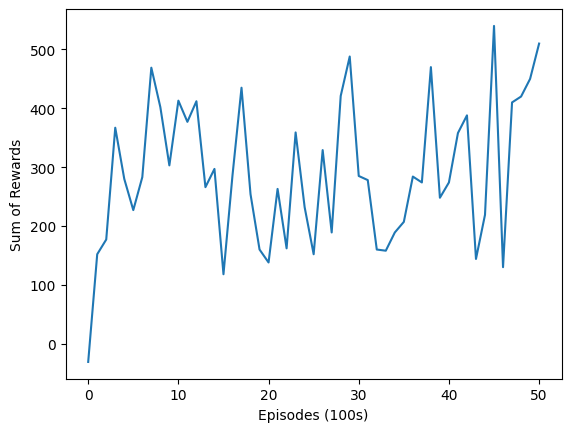

In [ ]:
def robby_robot():
    Q_matrix = np.zeros((3 ** 5, 5))#243 unique states
    rewards = []
    test_rewards = []
    epsilon = 0.1
    epsilon_decrement = epsilon / (num_of_episodes / 50) # Gradual decrement
    # training robby for N episodes
    for epoch in range(num_of_episodes+1):
        robby = Robby()#create a new instance of robby in every epoch
        for _ in range(steps):
            reward = 0
            current_state = robby.get_q_matrix_State()
            # choose an action a using e-greedy action selection
            action = None
            if random.random() < epsilon:
                action = random.randint(0, 4)
                # assign a reward based on the action taken
                reward = robby.do_action(action)
            else:
                #if all actions are zero, choose one at random
                if np.count_nonzero(Q_matrix[robby.get_q_matrix_State(), :]) == 0:
                    action = random.randint(0, 4)
                else:
                    action = np.argmax(Q_matrix[robby.get_q_matrix_State(), :])
                # receive reward
                reward = robby.do_action(action)
            # update Q formula
            Q_matrix[current_state, action] += learning_rate * (
                    reward + gamma * (max(Q_matrix[robby.get_q_matrix_State(), :])) - Q_matrix[current_state, action])

        if epoch % 50 == 0 and epsilon > 0:
           epsilon -= epsilon_decrement
           #epsilon = 0.5

        if epoch % 100 == 0:
            rewards.append(robby.reward)

    # test robby
    epsilon = 0.1
    for epoch in range(num_of_episodes+1):
        robby = Robby()
        for _ in range(steps):
            reward = 0
            current_state = robby.get_q_matrix_State()
            action = None
            if random.random() < epsilon:
                action = random.randint(0, 4)
                # assign a reward based on the action taken
                reward = robby.do_action(action)
            else:
                if np.count_nonzero(Q_matrix[robby.get_q_matrix_State(), :]) == 0:
                    action = random.randint(0, 4)
                else:
                    action = np.argmax(Q_matrix[robby.get_q_matrix_State(), :])
                reward = robby.do_action(action)

        if epoch % 100 == 0:
            test_rewards.append(robby.reward)

    print("Test Average: ", np.average(test_rewards))
    print("Test Standard Deviation: ", np.std(test_rewards))

    plt.xlabel('Episodes (100s)')
    plt.ylabel('Sum of Rewards')
    plt.plot(rewards)
    plt.savefig('Training Reward plot.png')
    plt.show()


if __name__ == "__main__":
    robby_robot()
